In [ ]:
#Looping Graph

#Objectives:
# make the graph on the right! You need to implement an automatic Higher or Lower game

# Set the bounds to between 1 to 20. The Graph has to keep guessing(max number of guesses is 7) where if the guess is correct, then it stops, but if not we keep looping until we hit the max limit of 7.

# Each time a number is guessed, the hint node should say higher or lower and the graph should account for this information and guess the next guess accordingly.

# Input : {"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound":1, "upper_bound": 20}
# Hint: It will need to adjust its bounds after every guess based on the hint provided by the hint node.

# Start -> setup - > guess -> (loop continue) -> 



In [18]:
from typing import TypedDict, Dict, List
from langgraph.graph import StateGraph, END # Framework that helps to design and manage the flow o teh tasks in application using a StateGraph
import random

In [20]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [21]:
def greeting_node(state: AgentState) -> AgentState:
    """Greeting node which says hi """
    state["name"] = f"Hi there,{state["name"]}"
    state["counter"] = 0
    
    return state

def random_node(state: AgentState) -> AgentState:
    """Generate a random number from 0 to 100"""
    state["number"].append(random.randint(0, 10))
    state["counter"] += 1
    
    return state

def should_continue(state: AgentState) -> AgentState:
    """function to decide what to do next"""
    if state["counter"] < 5:
        print("Entering Loop", state["counter"])
        return "loop"
    else:
        return "exit"
    

In [ ]:
#greeting -> random -> random -> random -> random -> random ->END

In [22]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")

graph.add_conditional_edges(
    "random",
    should_continue,
    {
        #Edge: Node
        "loop": "random",
        "exit": END
    }
)

graph.set_entry_point("greeting")

app = graph.compile()

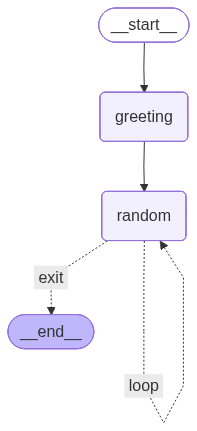

In [15]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
result = app.invoke({"name": "Samba", "number": [], "counter": -100})
print(result)

Entering Loop 1
Entering Loop 2
Entering Loop 3
Entering Loop 4
{'name': 'Hi there,Samba', 'number': [4, 4, 6, 5, 5], 'counter': 5}
